# FordGoBike Dataset analysis

## Dataset Overview

The dataset contains information on the FordGoBike which is an E-bike system, at the date of 2019-02, the dataset most notably contains:Bike id, Duration (sec), User type, User gender, User birth year and If the user enabled BikeShare for the entire trip. The dataset was provided by Udacity in the Visualization course.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1- Gather data

In [3]:
df = pd.read_csv('2019-fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# 2- Asses

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
21527,618,2019-02-26 09:06:11.3480,2019-02-26 09:16:29.4930,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,6214,Subscriber,1998.0,Female,No
168653,592,2019-02-04 14:04:59.3340,2019-02-04 14:14:51.7080,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,99.0,Folsom St at 15th St,37.767037,-122.415443,4711,Subscriber,1980.0,Male,No
37547,475,2019-02-23 13:53:25.1040,2019-02-23 14:01:20.1810,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,155.0,Emeryville Public Market,37.840521,-122.293528,4666,Subscriber,1990.0,Male,No
143501,240,2019-02-07 15:18:04.2800,2019-02-07 15:22:04.4440,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,337.0,Webster St at 19th St,37.806970,-122.266588,4720,Subscriber,1985.0,Female,No
61227,262,2019-02-20 17:56:37.1410,2019-02-20 18:00:59.6780,14.0,Clay St at Battery St,37.795001,-122.399970,22.0,Howard St at Beale St,37.789756,-122.394643,4358,Subscriber,1980.0,Male,No
168153,568,2019-02-04 16:03:38.6210,2019-02-04 16:13:06.9370,133.0,Valencia St at 22nd St,37.755213,-122.420975,61.0,Howard St at 8th St,37.776513,-122.411306,4759,Subscriber,1984.0,Male,No
24007,393,2019-02-25 18:59:21.6700,2019-02-25 19:05:54.7040,270.0,Ninth St at Heinz Ave,37.853489,-122.289415,351.0,10th St at University Ave,37.869060,-122.293400,4643,Subscriber,1988.0,Male,No
84142,1713,2019-02-17 18:21:54.3570,2019-02-17 18:50:28.1550,58.0,Market St at 10th St,37.776619,-122.417385,66.0,3rd St at Townsend St,37.778742,-122.392741,6267,Subscriber,1991.0,Male,No
39178,153,2019-02-23 10:12:08.3790,2019-02-23 10:14:42.0960,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,349.0,Howard St at Mary St,37.781010,-122.405666,5325,Subscriber,1968.0,Male,No
182348,818,2019-02-01 08:16:06.2740,2019-02-01 08:29:44.6010,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,649,Subscriber,1990.0,Male,No


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
df.shape

(183412, 16)

In [9]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
df.loc[df['start_station_id'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


it seems to have valid data despite the nulls, so we will keep it

In [11]:
df.duplicated().sum()

0

## Issues
- start_time and end_time should be in Datetime instead of String.
- bike_share_for_all_trip should be in Boolean instead of String
- since member_birth_year will mostly be used to calculate the age, i will add an "Age" column
- for the sake of this project, delete columns that wont be of use 
- drop rows with age > 100
- add days columns

## 3- Clean

### Define
- start_time and end_time should be in Datetime instead of String.
- bike_share_for_all_trip should be in Boolean instead of String

### Code

In [12]:
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [13]:
#df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('int')
df['bike_share_for_all_trip'].replace(('Yes', 'No'), (True, False), inplace=True)

### Test


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

We will skip the rest of the fixes for the slides.

### Define
- since member_birth_year will mostly be used to calculate the age, i will add an "Age" column

### Code

In [15]:
df['age'] = 2021 - df['member_birth_year']

### Test


In [16]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False,37.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,False,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,47.0


### Define
- delete columns that wont be of use

### Code

In [17]:
df.drop(columns=['start_station_id','start_station_name','end_station_id','end_station_name','bike_id','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],inplace=True)

### Test


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   user_type                183412 non-null  object        
 4   member_birth_year        175147 non-null  float64       
 5   member_gender            175147 non-null  object        
 6   bike_share_for_all_trip  183412 non-null  bool          
 7   age                      175147 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 10.0+ MB


In [19]:
df.head(10)

,duration_sec,start_time,end_time,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Customer,1984.0,Male,False,37.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,Customer,NaN,NaN,False,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Customer,1972.0,Male,False,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Subscriber,1989.0,Other,False,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Subscriber,1974.0,Male,True,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,Subscriber,1959.0,Male,False,62.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Subscriber,1983.0,Female,False,38.0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,Subscriber,1989.0,Male,False,32.0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,Subscriber,1988.0,Other,False,33.0
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,Subscriber,1992.0,Male,False,29.0


### Define
- drop rows with age > 100

### Code

In [20]:
df.drop(df[df.age > 100].index, inplace=True)

### Test


In [21]:
df[df.age > 100]

,duration_sec,start_time,end_time,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age


### Define
- add days columns

### Code

In [22]:
df['day_name']=df['start_time'].dt.dayofweek

### Test


In [23]:
df['day_name'].value_counts()

3    35190
1    31796
2    29630
4    28963
0    26841
6    15515
5    15402
Name: day_name, dtype: int64

# Key Insights

# Univariate Exploration.

## 1- Whats the average age of the Bike user.

Text(0.5, 1.0, 'FordGoBike - Age of users')

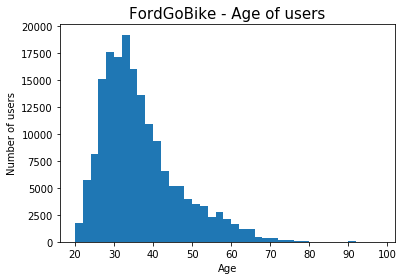

In [24]:
bins = np.arange(20,100,2)
plt.hist(data=df, x='age', bins = bins);
plt.xlabel('Age');
plt.ylabel('Number of users')
plt.title('FordGoBike - Age of users', fontsize=15)

## 2- Whats the percentage of each gender for bike users.

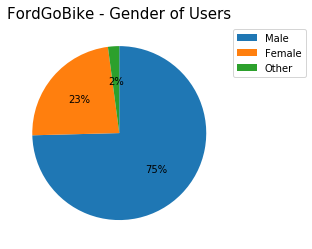

In [25]:
counts = df['member_gender'].value_counts()
plt.pie(x=counts, counterclock=False, startangle=90, autopct= '%1.0f%%');
plt.legend(counts.index, bbox_to_anchor=(1, 1));
plt.title('FordGoBike - Gender of Users',fontsize=15 );

## 3- How many rides have BikeShare enabled.

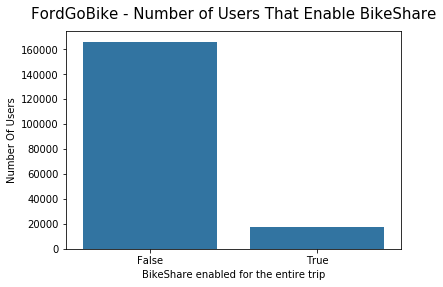

In [26]:
color = sns.color_palette()[0]
sns.countplot(data=df,x='bike_share_for_all_trip', color=color);
plt.xlabel('BikeShare enabled for the entire trip');
plt.ylabel('Number Of Users');
plt.title('FordGoBike - Number of Users That Enable BikeShare',fontsize=15, y=1.03);

## 4- How many users are not subscribed

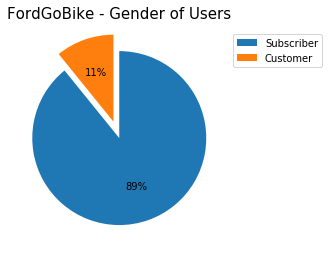

In [27]:
counts = df['user_type'].value_counts()
plt.pie(x=counts, counterclock=False, startangle=90, autopct= '%1.0f%%', explode=(0,0.2));
plt.legend(counts.index, bbox_to_anchor=(1, 1));
plt.title('FordGoBike - Gender of Users',fontsize=15, y=1.02);

# Bivariate Exploration.

In [31]:
df.groupby('member_gender')['duration_sec'].mean()

member_gender
Female    779.147637
Male      672.639883
Other     996.589154
Name: duration_sec, dtype: float64

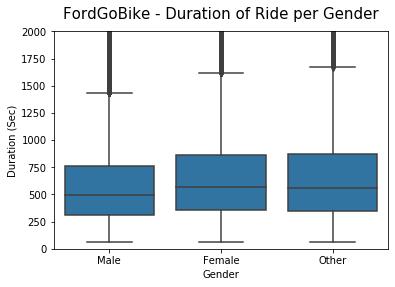

In [28]:
sns.boxplot(data = df, x='member_gender', y='duration_sec', color = color, order=(['Male','Female','Other']));
plt.ylim(0,2000);
plt.xlabel('Gender');
plt.ylabel('Duration (Sec)');
plt.title('FordGoBike - Duration of Ride per Gender',fontsize=15, y=1.03);

## 1- What are the most active/inactive days of the week

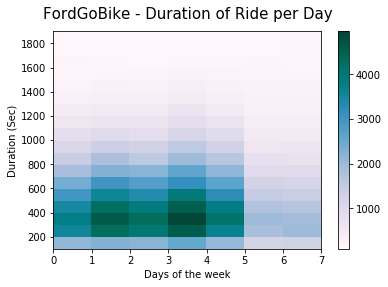

In [29]:
x_bins = np.arange(0,8,1)
y_bins = np.arange(100,2000,100)
majority = df[df['duration_sec']<2000]
plt.hist2d(data=majority, x='day_name', y='duration_sec',bins=[x_bins,y_bins],cmap = 'PuBuGn');
plt.xlabel('Days of the week');
plt.ylabel('Duration (Sec)');
plt.title('FordGoBike - Duration of Ride per Day',fontsize=15, y=1.03);
plt.colorbar();

From the previous visualization, we find the following insights:
- Weekdays appear more active than weekends.
- The most active days are Tuesday and thursday.
- The most inactive days are the weekends (Saturday and Sunday).

## 3- Do subscribers enable BikeShare more than customers?

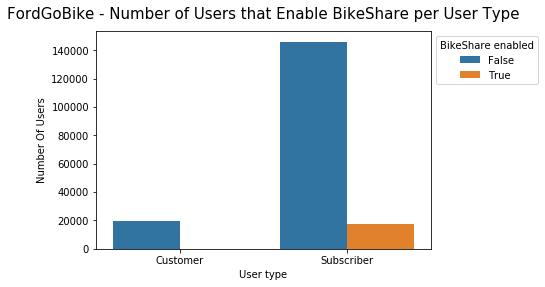

In [30]:
sns.countplot(data=df, x = 'user_type', hue='bike_share_for_all_trip');
plt.legend(bbox_to_anchor=(1, 1),title = 'BikeShare enabled');
plt.xlabel('User type');
plt.ylabel('Number Of Users');
plt.title('FordGoBike - Number of Users that Enable BikeShare per User Type',fontsize=15, y=1.03);

In [34]:
counts = df.groupby(['member_gender','bike_share_for_all_trip']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(index='member_gender', columns='bike_share_for_all_trip', values='count')

In [35]:
counts

bike_share_for_all_trip,False,True
member_gender,,
Female,37230,3600
Male,117507,13084
Other,3003,648


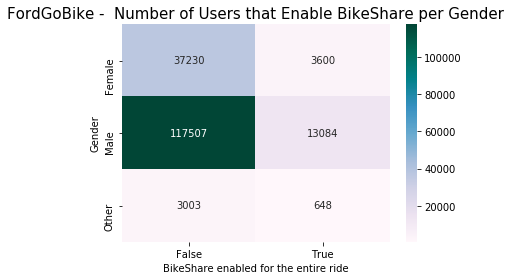

In [36]:
sns.heatmap(counts,annot=True,fmt='d', cmap='PuBuGn');
plt.xlabel('BikeShare enabled for the entire ride');
plt.ylabel('Gender');
plt.title('FordGoBike -  Number of Users that Enable BikeShare per Gender',fontsize=15, y=1.03);

## 2- Are subscribers more active during the week than customers?

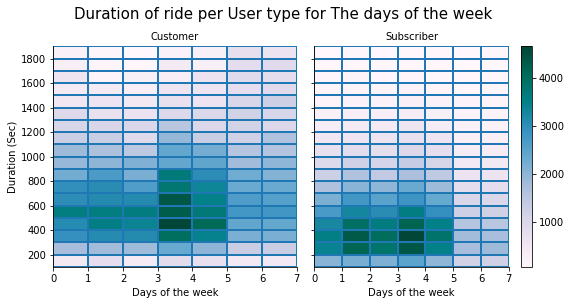

In [37]:
x_bins = np.arange(0,8,1)
y_bins = np.arange(100,2000, 100)
g = sns.FacetGrid(data=df, col='user_type', height=4);
g.map(plt.hist2d, 'day_name', 'duration_sec', cmap = 'PuBuGn', bins=[x_bins,y_bins]);
plt.colorbar();
g.set_axis_labels("Days of the week", "Duration (Sec)");
g.set_titles(col_template="{col_name}");
g.fig.suptitle('Duration of ride per User type for The days of the week',y='1.05',fontsize=15);

From the previous visualization, we find the following insights:
- Customers are more active during weekends than subscribers.
- Subscribers are more active during weekdays than customers.
- On average, customers go for longer rides than subscribers.

In [39]:
df.groupby(['user_type','member_gender'])['duration_sec'].mean()

user_type   member_gender
Customer    Female           1422.947051
            Male             1253.643384
            Other            1589.125275
Subscriber  Female            696.484247
            Male              616.401618
            Other             912.232478
Name: duration_sec, dtype: float64

## 3-Whats the duration for each gender/User type

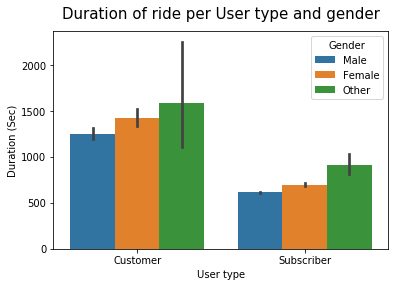

In [38]:
ax = sns.barplot(data=df, x = 'user_type', y='duration_sec', hue='member_gender',hue_order=['Male','Female','Other'])
ax.legend(title='Gender');
plt.xlabel('User type');
plt.ylabel('Duration (Sec)');
plt.title('Duration of ride per User type and gender',fontsize=15,y=1.03);

From the previous visualization, we find the following insights:
- in general, customers have longer rides across all genders than subscribers.
- 'Other' genders have the longist rides followed by female then male.
- 'Other' genders have the highiest variance and outliers in terms of duration

## 3- Whats the duration of BikeShare users per gender.

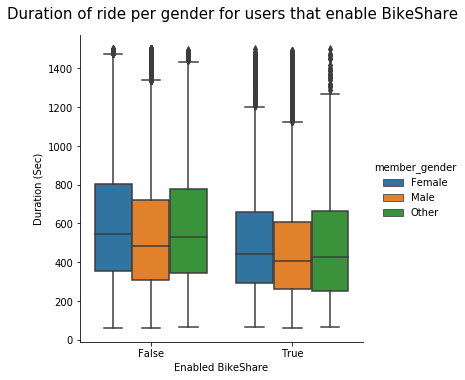

In [39]:
majority = df.loc[df.duration_sec < 1500]
g = sns.catplot(data=majority, x='bike_share_for_all_trip', y='duration_sec',hue='member_gender',kind='box')

g.set_axis_labels("Enabled BikeShare", "Duration (Sec)");
g.set_titles(col_template="{col_name}");
g.fig.suptitle('Duration of ride per gender for users that enable BikeShare',y='1.05',fontsize=15);